In [24]:
!pip install folium

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap

In [29]:
df = pd.read_csv('US_Accidents_March23.csv')

In [31]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum() / len(df) * 100)

(7728394, 46)
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source            

In [39]:
# Step 4: Feature Engineering
# Step 4: Feature Engineering (Fixed)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

In [47]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


In [49]:
# Grouping Weather
df['Weather_Category'] = df['Weather_Condition'].apply(lambda x: 
    'Rain' if 'Rain' in str(x) else
    'Snow' if 'Snow' in str(x) else
    'Fog' if 'Fog' in str(x) or 'Haze' in str(x) else
    'Clear' if 'Clear' in str(x) or 'Fair' in str(x) else
    'Cloudy' if 'Cloudy' in str(x) or 'Overcast' in str(x) else
    'Other'
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8616\2544449067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


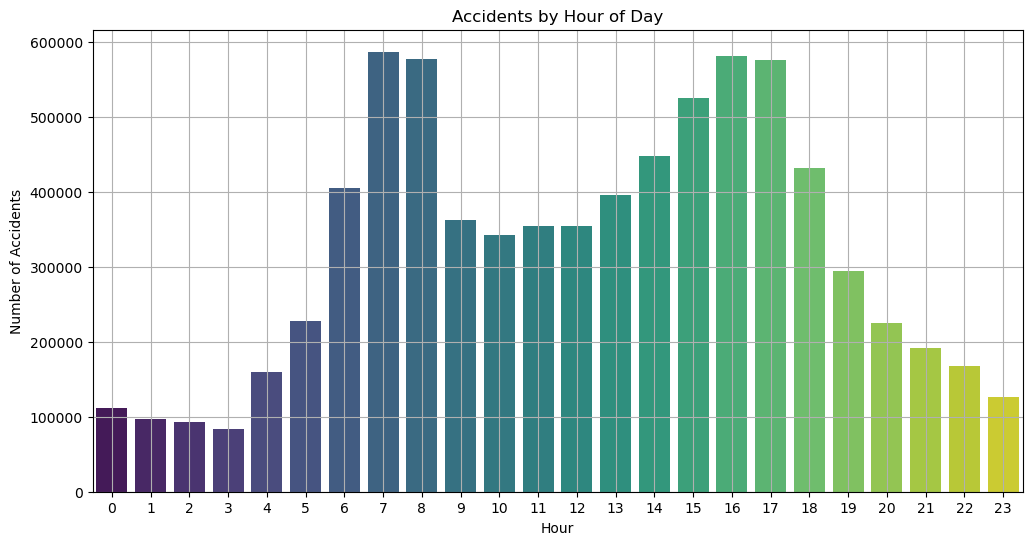

In [51]:
# Step 5: Accidents by Time of Day
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<Axes: xlabel='Weekday', ylabel='count'>

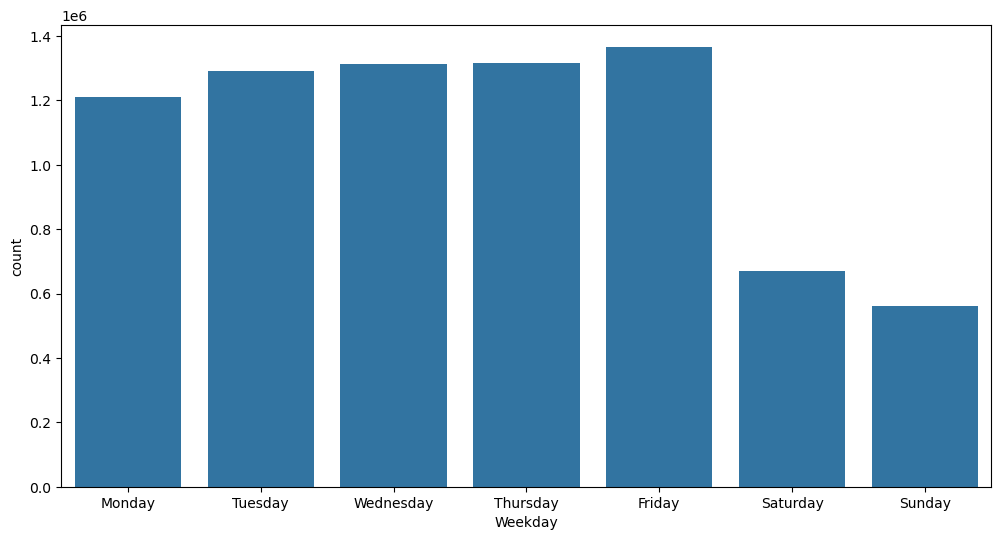

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='Weekday', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

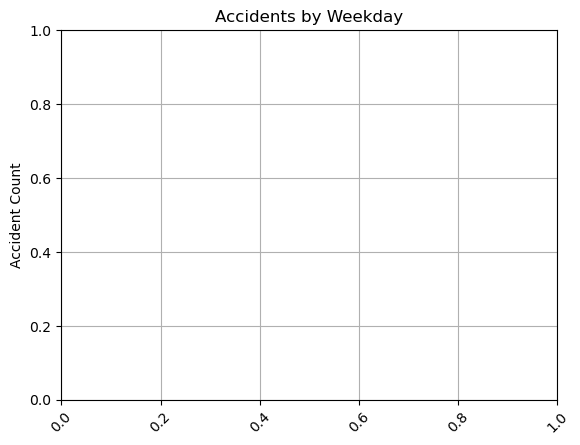

In [55]:
# Step 6: Accidents by Day of Week

plt.title("Accidents by Weekday")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8616\2330849535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather_Category', order=df['Weather_Category'].value_counts().index, palette='coolwarm')


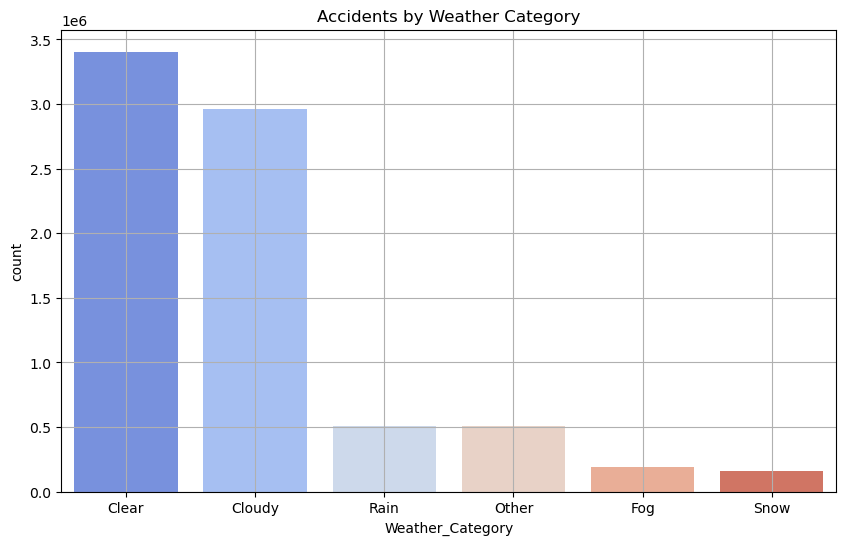

In [57]:
# Step 7: Accidents by Weather Category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weather_Category', order=df['Weather_Category'].value_counts().index, palette='coolwarm')
plt.title("Accidents by Weather Category")
plt.grid(True)
plt.show()


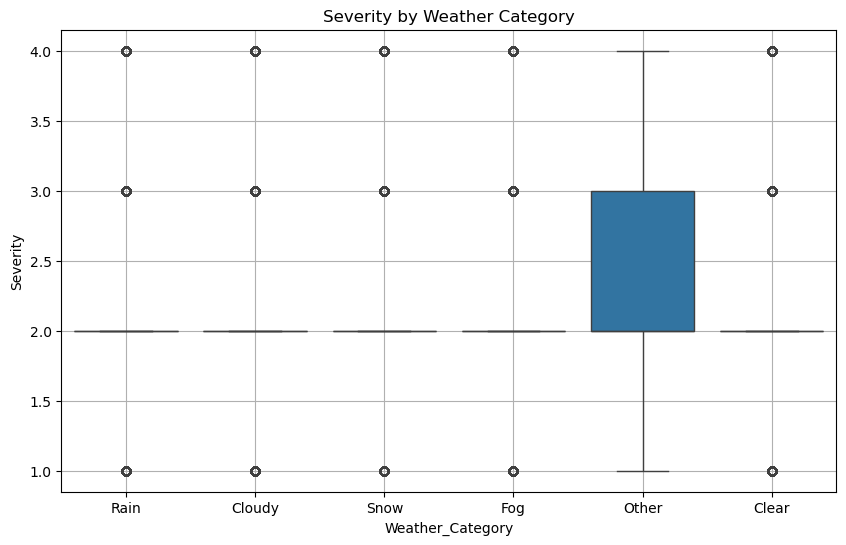

In [59]:
# Step 8: Severity by Weather
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather_Category', y='Severity')
plt.title("Severity by Weather Category")
plt.grid(True)
plt.show()

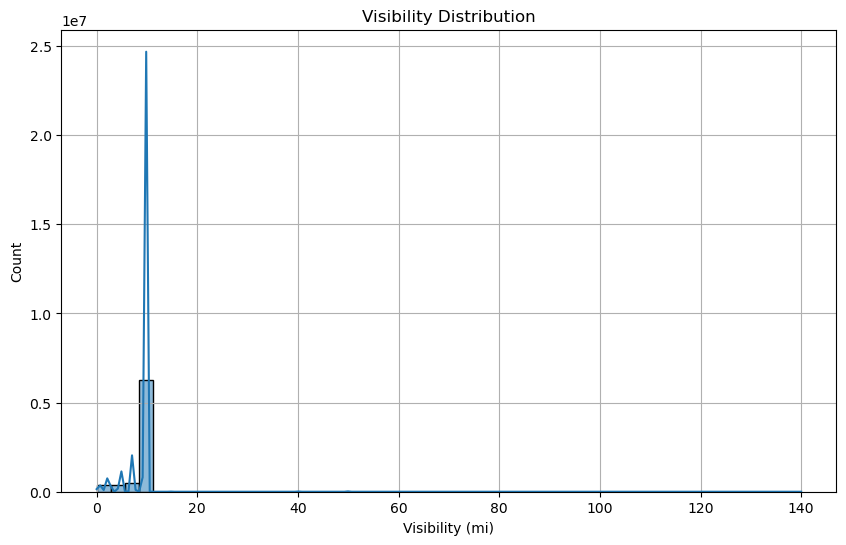

In [61]:
# Step 9: Visibility Effect
plt.figure(figsize=(10,6))
sns.histplot(df['Visibility(mi)'], bins=50, kde=True)
plt.title("Visibility Distribution")
plt.xlabel("Visibility (mi)")
plt.grid(True)
plt.show()

In [63]:
# Step 10: Geospatial Heatmap of Accidents
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=1)

heatmap_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)  # Center on USA
HeatMap(data=sample_df.values, radius=8, max_zoom=13).add_to(heatmap_map)


In [65]:
# Save and display heatmap
heatmap_map.save("us_accidents_heatmap.html")
print("Heatmap saved as us_accidents_heatmap.html")

Heatmap saved as us_accidents_heatmap.html


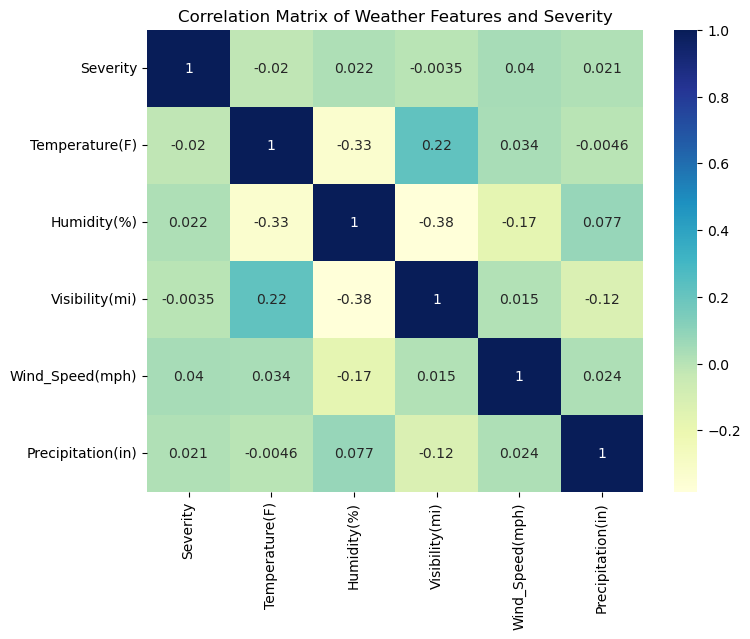

In [67]:

# Step 11: Correlation Analysis
num_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
corr = df[num_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix of Weather Features and Severity")
plt.show()